# Data reading of the database
A.Iragena supervised by Mr Kaufmann

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sqlite3 
from sqlite3 import Error


In [96]:
from striplog.striplog import Striplog
from striplog import Legend, Lexicon, Interval, Component, Position


In [97]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn
 

In [98]:
def select_datat_of_db(conn,table):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute(table)
 
    rows = cur.fetchall()
    #result = [dict(row) for row in cur.fetchall()]
    for row in rows:
        print(row)
    return(rows)
    #return(result)

In [99]:
database = r"project_database.db"

### Create a database connection & import the data from the database

In [100]:
import pandas as pd

In [101]:
#conn = create_connection(database)
#bhs=pd.read_sql("SELECT * FROM Boreholes", conn)

In [102]:
#bhs

The code below read the database and put the data in the dataframe dfs

In [103]:
# tables = ['Boreholes', 'Component', 'Intervals', 'lexicon']
# for i in tables:    
#     print("---{table:s} data--- ".format(table=i))

In [104]:
conn = create_connection(database)
tables = ['Boreholes', 'Components', 'Intervals', 'Lexicon'] # table names in the database
dfs = {}
with conn:    
    for i in tables:    
        print("---{table:s} data--- ".format(table=i))
        sql_cmd = "SELECT * FROM {table:s}".format(table=i) # to select the data of the table Boreholes
        dfs.update({i:  pd.read_sql(sql_cmd, conn)})

---Boreholes data--- 
---Components data--- 
---Intervals data--- 
---Lexicon data--- 


### Manipulation of the dataframe 

In [105]:
dfs['Intervals'] # just to check if the content of Intervals table is correct

,borehole,top,base,description
0,F10,0.0,1.5,remblais non-saturés
1,F10,1.5,4.0,remblais saturés
2,F10,4.0,6.0,alluvions
3,F11,0.0,1.5,remblais non-saturés
4,F11,1.5,4.0,remblais saturés
5,F11,4.0,6.0,alluvions
6,F12,0.0,1.5,remblais non-saturés
7,F12,1.5,4.0,remblais saturés
8,F12,4.0,6.0,alluvions
9,F13,0.0,1.5,remblais non-saturés


In [106]:
dfs['Components'].query('borehole=="F25" and key=="colour"') # To look for the color of the bh F25, in Component table

,borehole,top,base,key,value
73,F25,0.0,1.5,colour,brun
75,F25,1.5,4.0,colour,ocre
77,F25,4.0,6.0,colour,gris


In [107]:
dfs['Intervals'].head()

,borehole,top,base,description
0,F10,0.0,1.5,remblais non-saturés
1,F10,1.5,4.0,remblais saturés
2,F10,4.0,6.0,alluvions
3,F11,0.0,1.5,remblais non-saturés
4,F11,1.5,4.0,remblais saturés


In [108]:
dfs['Components'].head()

,borehole,top,base,key,value
0,F10,0.0,1.5,lithology,remblais
1,F10,0.0,1.5,colour,brun
2,F10,1.5,4.0,lithology,remblais
3,F10,1.5,4.0,colour,ocre
4,F10,4.0,6.0,lithology,silt


In [109]:
bh_test = 'F10'
dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test)) # show all the intervals of bh_test

,borehole,top,base,description
0,F10,0.0,1.5,remblais non-saturés
1,F10,1.5,4.0,remblais saturés
2,F10,4.0,6.0,alluvions


In [110]:
bh_test = 'F10'
dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))['top'] # Only shows the column 'Top' for bh_test

0    0.0
1    1.5
2    4.0
Name: top, dtype: float64

### Creation of the striplog object for 1 borehole

In [111]:
bh_test = 'F10'
bh_strip = []  # striplog object 
intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        components_dict.update({r[1]['key']:r[1]['value']})
    bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
          'base': Position(middle=row[1]['base'], units='m'),
          'description': row[1]['description'], 'components': [Component(components_dict)]})

In [112]:
bh_strip

[{'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
  'base': Position({'middle': 1.5, 'units': 'm'}),
  'description': 'remblais non-saturés',
  'components': [Component({'lithology': 'remblais', 'colour': 'brun'})]},
 {'top': Position({'middle': 1.5, 'units': 'm'}),
  'base': Position({'middle': 4.0, 'units': 'm'}),
  'description': 'remblais saturés',
  'components': [Component({'lithology': 'remblais', 'colour': 'ocre'})]},
 {'top': Position({'middle': 4.0, 'units': 'm'}),
  'base': Position({'middle': 6.0, 'units': 'm'}),
  'description': 'alluvions',
  'components': [Component({'lithology': 'silt', 'colour': 'gris'})]}]

In [113]:
for bh_row in dfs['Boreholes'].iterrows():
    print(bh_row[1][0])

F10
F11
F12
F13
F14
F15
F16
F20
F21
F22
F23
F24
F25


### Defining of legend

In [114]:
new_legend="legend_GSDMA.csv"  # A specific legend has been created which in islegend_GSDMA.csv
my_legend = Legend.from_csv(filename=new_legend)
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

#legend = Legend.builtin('GSDMA') 
print(my_legend)

Decor({'_colour': '#91662b', 'width': 5.0, 'hatch': 'x', 'component': Component({'lithology': 'remblais', 'colour': 'ocre'})})
Decor({'_colour': '#777545', 'width': 5.0, 'hatch': '.--', 'component': Component({'lithology': 'none', 'colour': 'vert'})})
Decor({'_colour': '#b4a87d', 'width': 5.0, 'hatch': '.--', 'component': Component({'lithology': 'silt', 'colour': 'gris brun'})})
Decor({'_colour': '#7a7861', 'width': 5.0, 'component': Component({'lithology': 'none', 'colour': 'vert foncé'}), 'hatch': None})
Decor({'_colour': '#d9d6b7', 'width': 5.0, 'component': Component({'lithology': 'none', 'colour': 'gris blanc'}), 'hatch': None})
Decor({'_colour': '#7e8388', 'width': 5.0, 'component': Component({'lithology': 'none', 'colour': 'gris'}), 'hatch': None})
Decor({'_colour': '#9a887f', 'width': 5.0, 'component': Component({'lithology': 'none', 'colour': 'gris violet'}), 'hatch': None})
Decor({'_colour': '#593c1e', 'width': 5.0, 'hatch': 'x', 'component': Component({'lithology': 'remblais

In [115]:
print(Legend.builtin('NSDOE'))

Decor({'_colour': '#f7e9a6', 'width': 3.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}), 'hatch': None})
Decor({'_colour': '#ff99cc', 'width': 2.0, 'component': Component({'lithology': 'anhydrite'}), 'hatch': None})
Decor({'_colour': '#dbd6bc', 'width': 3.0, 'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'hatch': None})
Decor({'_colour': '#ff4c4a', 'width': 2.0, 'component': Component({'lithology': 'volcanic'}), 'hatch': None})
Decor({'_colour': '#86f0b6', 'width': 5.0, 'component': Component({'lithology': 'conglomerate'}), 'hatch': None})
Decor({'_colour': '#ff96f6', 'width': 2.0, 'component': Component({'lithology': 'halite'}), 'hatch': None})
Decor({'_colour': '#f2ff42', 'width': 4.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'f-m'}), 'hatch': None})
Decor({'_colour': '#dbc9bc', 'width': 3.0, 'component': Component({'lithology': 'heterolithic', 'colour': 'red'}), 'hatch': No

# Complete extraction of boreholes from the database

In [116]:
# BON !!!
bhs_striplog = {}
for bh_row in dfs['Boreholes'].iterrows(): # For all bh
    bh_strip = []
    intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_row[1][0]))[['top','base', 'description']] # Look for the interval for the bh
    for row in intervals.iterrows():
        components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
        components_dict={}
        for r in components.iterrows():
            components_dict.update({r[1]['key']:r[1]['value']})
        bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
              'base': Position(middle=row[1]['base'], units='m'),
              'description': row[1]['description'], 'components': [Component(components_dict)]})
    
    bhs_striplog.update({bh_row[1][0]: bh_strip})

In [120]:
type(dfs['Components']['value'])
 

pandas.core.series.Series

In [121]:
bhs_striplog = {}
Intvll=[]
for bh_row in dfs['Boreholes'].iterrows(): # For all bh
    bh_strip = []
    intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_row[1][0]))[['top','base', 'description']] # Look for the interval for the bh
    component={}
    for row in intervals.iterrows():
        litho = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f} and key=="{key:s}"'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base'], key='lithology'))['value']
        color= dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f} and key=="{key:s}"'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base'], key='colour'))['value']
        #print(litho)
#         print(color)
        #litho=compnent['lithology'][0]
        #color=compnent['color'][0]
        #litho=compnent['value'][0]
        #color=compnent['value'][1]
        #components_dict={}
        #for r in components.iterrows():
            #components_dict.update({r[1]['key']:r[1]['value']})
    Intvll.append(Interval(top=row[1]['top'], base=row[1]['base'], description=row[1]['description'], components=[Component({'lithology':litho[4],'colour': color})]))
#type(litho)
print(color[4])
        

KeyError: 4

In [ ]:
#Intvll

#compnent['key'][1]

In [ ]:
dfs['Components']

In [ ]:
bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
              'base': Position(middle=row[1]['base'], units='m'),
              'description': row[1]['description'], 'components': [Component('lithology': litho, 'colour': color)]})
    
    bhs_striplog.update({bh_row[1][0]: bh_strip})

In [ ]:
Interval?

In [122]:
bhs_striplog

{}

In [ ]:
bhs_striplog['F10'][0]


In [ ]:
for bh_row in bhs_striplog.iterrows():
    bhs_striplog[bh_row]
    print(bhs_striplog[bh_row])

In [128]:
# Modifié:
bhs_striplog = {}
intvl= []
for bh_row in dfs['Boreholes'].iterrows(): # For all bh
    bh_strip = []
    intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_row[1][0]))[['top','base', 'description']] # Look for the interval for the bh
     for row in intervals.iterrows():
        components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_row[1][0], top=row[1]['top'], base=row[1]['base'])) # Look for components of the bh
        components_dict={}
         for r in components.iterrows():
            components_dict.update({r[1]['key']:r[1]['value']})
            bh_strip.append(Interval({'top': Position(middle=row[1]['top'], units='m'), 
               'base': Position(middle=row[1]['base'], units='m'),
               'description': row[1]['description'],'data': {}, 'components': [Component(components_dict)]}))
        bh_strip=Interval(top=Position(middle=row[1]['top'], units='m'), base=Position(middle=row[1]['base'], units='m'), description=row[1]['description'], components=[Component(components_dict)])
#         type(bh_strip)
        bhs_striplog.update({bh_row[1][0]: bh_strip[1][0]})
    

IndentationError: unexpected indent (<ipython-input-128-3ee4994b0970>, line 7)

In [ ]:
bhs_striplog['F15'] # Boreholes data in striplog structure

In [129]:
s_to_plot="F10"                  # Nom du bh à plotter avec striplog
s_list=bhs_striplog['F10']  # List d'intervalles du bh: s_to_plot

i4 = Interval(top=0, base=10, components=[Component({'lithology': 'silt','colour': 'gris brun'})]) #selon my_legend
i3 = Interval(top=10, base=40, components=[Component({'lithology': 'remblais','colour': ''})]) #selon my_legend
i1 = Interval(top=0, base=20, components=[Component({'lithology': 'limestone'})])
i2 = Interval(top=20, base=60, components=[Component({'lithology': 'shale'})])
i=[i3,i4]

# print(i)

s_striplog=Striplog(s_list)
# s_striplog.plot(my_legend, ladder=True, aspect=2)


#  s_striplog=Striplog.__init__(None,i, source=None, order='auto') # conversion en object striplog

KeyError: 'F10'

In [130]:
# print(i1)
print(s_list)

NameError: name 's_list' is not defined

In [131]:
print(i)

1


In [132]:
print(s_list[0])

NameError: name 's_list' is not defined

In [133]:
#s_striplog.plot(my_legend, ladder=True, aspect=2) # aspect : échelle de graphe
s_striplog.plot(my_legend, ladder=True, aspect=2)
my_legend.plot() # pour afficher la légende

NameError: name 's_striplog' is not defined

In [134]:
bh_test = 'F10'
bh_strip = []  # striplog object 
intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        components_dict.update({r[1]['key']:r[1]['value']})
    bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
          'base': Position(middle=row[1]['base'], units='m'),
          'description': row[1]['description'], 'components': [Component(components_dict)]})

In [135]:
#Version modifiée
bh_test = 'F10'
#bh1_strip = []  # striplog object 
intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        components_dict.update({r[1]['key']:r[1]['value']})
        bh1_strip.append(Interval({'top': Position(middle=row[1]['top'], units='m'), 
                            'base': Position(middle=row[1]['base'], units='m'),
                            'description': row[1]['description'], 'components': [Component(components_dict)]}))
        
#     bh1_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
#           'base': Position(middle=row[1]['base'], units='m'),
#           'description': row[1]['description'], 'components': [Component(components_dict)]})

NameError: name 'bh1_strip' is not defined

In [136]:
bh_test = 'F10'
bh_strip = []  # striplog object 
Interval[bh_test] = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        Component=components_dict.update({r[1]['key']:r[1]['value']})
        bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
          'base': Position(middle=row[1]['base'], units='m'),
          'description': row[1]['description'], 'components': [Component(components_dict)]})

TypeError: 'type' object does not support item assignment

In [137]:
type(bhs_striplog)

dict

In [138]:
bhs_striplog["F10"]["Intervals"]

KeyError: 'F10'

# Test fonctionnel

In [139]:
#Modifié
bhs_striplog = {}
for bh_row in dfs['Boreholes'].iterrows(): # For all bh
    bh_strip = []
    intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_row[1][0]))[['top','base', 'description']] # Look for the interval for the bh
    for row in intervals.iterrows():
        components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_row[1][0], top=row[1]['top'], base=row[1]['base'])) # Look for components of the bh
        components_dict={}
        for r in components.iterrows():
            components_dict.update({r[1]['key']:r[1]['value']})
            components_dict.update({r[1]['key']:r[1]['value']})
            bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
            'base': Position(middle=row[1]['base'], units='m'),
            'description': row[1]['description'],'data': {}, 'components': [Component(components_dict)]})
        
        bhs_striplog.update({bh_row[1][0]: bh_strip})
        
    #print(intervals)

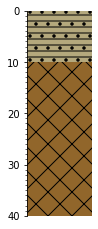

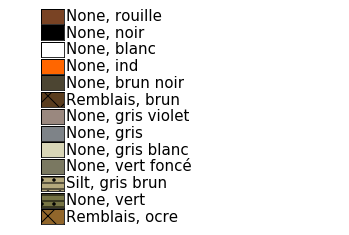

In [140]:
s_to_plot="F10"                  # Nom du bh à plotter avec striplog
s_list=bhs_striplog['F10']  # List d'intervalles du bh: s_to_plot

i4 = Interval(top=0, base=10, components=[Component({'lithology': 'silt','colour': 'gris brun'})]) #selon my_legend
i3 = Interval(top=10, base=40, components=[Component({'lithology': 'remblais','colour': 'ocre'})]) #selon my_legend
i1 = Interval(top=0, base=20, components=[Component({'lithology': 'limestone'})])
i2 = Interval(top=20, base=60, components=[Component({'lithology': 'shale'})])
i=[i3,i4]

# print(i)

s_striplog=Striplog(i)
s_striplog.plot(my_legend, ladder=True, aspect=2)
my_legend.plot() # pour afficher la légende


#  s_striplog=Striplog.__init__(None,i, source=None, order='auto') # conversion en object striplog

In [157]:
s_to_plot="F10"                  # Nom du bh à plotter avec striplog
s_list=bhs_striplog['F10']  # List d'intervalles du bh: s_to_plot
intvls=[]
for i in s_list:
    intvls.append(Interval(s_list[i]))

TypeError: list indices must be integers or slices, not dict

In [158]:
s_list

#  s_striplog=Striplog.__init__(None,i, source=None, order='auto') # conversion en object striplog

[{'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
  'base': Position({'middle': 1.5, 'units': 'm'}),
  'description': 'remblais non-saturés',
  'data': {},
  'components': [Component({'lithology': 'remblais'})]},
 {'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
  'base': Position({'middle': 1.5, 'units': 'm'}),
  'description': 'remblais non-saturés',
  'data': {},
  'components': [Component({'lithology': 'remblais', 'colour': 'brun'})]},
 {'top': Position({'middle': 1.5, 'units': 'm'}),
  'base': Position({'middle': 4.0, 'units': 'm'}),
  'description': 'remblais saturés',
  'data': {},
  'components': [Component({'lithology': 'remblais'})]},
 {'top': Position({'middle': 1.5, 'units': 'm'}),
  'base': Position({'middle': 4.0, 'units': 'm'}),
  'description': 'remblais saturés',
  'data': {},
  'components': [Component({'lithology': 'remblais', 'colour': 'ocre'})]},
 {'top': Position({'middle': 4.0, 'units': 'm'}),
  'base': Posi

In [ ]:
s_striplog=Striplog(s_list)
s_striplog.plot(my_legend, ladder=True, aspect=2)
my_legend.plot() # pour afficher la légende



## Add lexicon

In [ ]:
dfs['lexicon']

In [ ]:
bh_strip.append(dfs['lexicon']) # Command to add smthg 

#### Structure of 1 interval of the striplog
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}


In [ ]:
bh_strip


# Trials

In [ ]:
def from_sqlite_Row_to_dict(list_with_rows):
    ''' Turn a list with sqlite3.Row objects into a dictionary'''
    d ={} # the dictionary to be filled with the row data and to be returned

    for i, row in enumerate(list_with_rows): # iterate throw the sqlite3.Row objects            
        l = [] # for each Row use a separate list
        for col in range(0, len(row)): # copy over the row date (ie. column data) to a list
            l.append(row[col])
        d[i] = l # add the list to the dictionary   
    return d

In [ ]:
dic=from_sqlite_Row_to_dict(comp)


In [ ]:
d['F10', ] 


In [ ]:
conn = create_connection(database)
with conn:    
        
    print("---BOREHOLES data--- ")
    table_bh="SELECT * FROM Boreholes" # to select the data of the table Boreholes
    bh=select_datat_of_db(conn,table_bh)
    
    print("---COMPONENTS data--- ")
    table_comp="SELECT * FROM Component" # to select the data of the table component
    comp=select_datat_of_db(conn,table_comp)
    
    print("---INTERVAL data--- ")
    table_int="SELECT * FROM Intervals" # to select the data of the table Intervals
    intvl=select_datat_of_db(conn,table_int)
    
    print("---LEXICON--- ")
    table_lex="SELECT * FROM lexicon" # to select the data of the table Intervals
    lex=select_datat_of_db(conn,table_lex)
    
    
 

In [ ]:
conn = create_connection(database)
with conn:    
        
    print("---BOREHOLES data--- ")
    table_bh="SELECT * FROM Boreholes" # to select the data of the table Boreholes
    bh=select_datat_of_db(conn,table_bh)
    
    print("---COMPONENTS data--- ")
    table_comp="SELECT * FROM Component" # to select the data of the table component
    comp=select_datat_of_db(conn,table_comp)
    
    print("---INTERVAL data--- ")
    table_int="SELECT * FROM Intervals" # to select the data of the table Intervals
    intvl=select_datat_of_db(conn,table_int)
    
    print("---LEXICON--- ")
    table_lex="SELECT * FROM lexicon" # to select the data of the table Intervals
    lex=select_datat_of_db(conn,table_lex)
 
 

In [ ]:
bh # is a list, cause it has brackets
bh[0]
lex
type(intvl)
intvl[0][0]
bh[1][0]
comp[1][4]
lexicon=lex